# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [2]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from path import Path
from newsapi import NewsApiClient
import re

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\atoos\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Read your api key environment variable
# YOUR CODE HERE!
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [4]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!
bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language="en",
    page_size = 100,
    sort_by="relevancy"
)
print(f"Total articles about Bitcoin: {bitcoin_news['totalResults']}")

Total articles about Bitcoin: 8467


In [6]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
ethereum_news = newsapi.get_everything(
    q="ethereum",
    language="en",
    page_size = 100,
    sort_by="relevancy"
)
print(f"Total articles about Ethereum: {ethereum_news['totalResults']}")

Total articles about Ethereum: 4416


In [7]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
articles = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        articles.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(articles)

bitcoin_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831
1,2022-03-24,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730
2,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
3,2022-03-23,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831


In [8]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!
for article in ethereum_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        articles.append({
            "date": date,
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(articles)

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831
1,2022-03-24,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730
2,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000
3,2022-03-23,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831


In [9]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
bitcoin_df.describe()

,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.000000
mean,0.112412,0.07485,0.042740,0.882370
std,0.410367,0.06593,0.055499,0.077372
min,-0.778300,0.00000,0.000000,0.699000
25%,-0.128000,0.00000,0.000000,0.837500
50%,0.038700,0.07400,0.000000,0.868000
75%,0.458800,0.10475,0.072750,0.935750
max,0.910000,0.30100,0.187000,1.000000


In [10]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
ethereum_df.describe()

,compound,positive,negative,neutral
count,200.000000,200.000000,200.000000,200.00000
mean,0.139778,0.077155,0.039040,0.88377
std,0.420047,0.070039,0.056657,0.08219
min,-0.913600,0.000000,0.000000,0.68200
25%,-0.102700,0.000000,0.000000,0.83750
50%,0.121700,0.074000,0.000000,0.88600
75%,0.509625,0.114500,0.067000,0.94300
max,0.910000,0.301000,0.312000,1.00000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum

Q: Which coin had the highest compound score?

A: Both coins have the same max compound score of 0.91 . 

Q. Which coin had the highest positive score?

A: Both coins have the same max positive score of 0.301 .

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\atoos\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [12]:
# Instantiate the lemmatizer
# YOUR CODE HERE!
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

In [13]:
# Complete the tokenizer function
# Bitcoin
def tokenizer(doc):
    #"""Tokenizes text."""
    
    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
   
    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase and Remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]

    return output

In [14]:
btc_processed = bitcoin_df.text.apply(tokenizer)
print(btc_processed)

0     [mr, spiekers, prominent, customer, described,...
1     [fund, vehicle, hold, crypto, directly, theyre...
2     [russia, invaded, ukraine, niki, proshin, wa, ...
3     [san, salvador, march, reuters, el, salvador, ...
4     [bitcoin, wa, seen, many, libertarianleaning, ...
                            ...                        
95    [dogecoin, worth, ruble, according, ukraines, ...
96    [article, contentontario, superior, court, jus...
97    [drawing, depicts, woman, red, alexander, wang...
98    [bitcoin, friday, briefly, traded, psychologic...
99    [illustration, carlo, cadenas, verge, russias,...
Name: text, Length: 100, dtype: object


In [15]:
eth_processed = ethereum_df.text.apply(tokenizer)
print(eth_processed)

0      [mr, spiekers, prominent, customer, described,...
1      [fund, vehicle, hold, crypto, directly, theyre...
2      [russia, invaded, ukraine, niki, proshin, wa, ...
3      [san, salvador, march, reuters, el, salvador, ...
4      [bitcoin, wa, seen, many, libertarianleaning, ...
                             ...                        
195    [seems, cryptocurrency, mining, enthusiast, fo...
196    [indre, viltrakyte, remembers, mean, live, sov...
197    [enter, world, cryptocurrencies, inevitably, e...
198    [happenedafter, impressive, week, value, crypt...
199    [whether, one, think, nfts, cryptocurrencies, ...
Name: text, Length: 200, dtype: object


In [16]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!
bitcoin_df['Tokens'] = btc_processed
bitcoin_df

,date,text,compound,positive,negative,neutral,Tokens
0,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831,"[mr, spiekers, prominent, customer, described,..."
1,2022-03-24,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730,"[fund, vehicle, hold, crypto, directly, theyre..."
2,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
3,2022-03-23,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877,"[san, salvador, march, reuters, el, salvador, ..."
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."
...,...,...,...,...,...,...,...
95,2022-03-02,"Dogecoin is now worth more than rubles, accord...",0.5574,0.186,0.067,0.747,"[dogecoin, worth, ruble, according, ukraines, ..."
96,2022-02-28,Article content\r\nOntario Superior Court Just...,0.9100,0.301,0.000,0.699,"[article, contentontario, superior, court, jus..."
97,2022-03-25,The drawing depicts a woman in a red Alexander...,-0.5106,0.000,0.084,0.916,"[drawing, depicts, woman, red, alexander, wang..."
98,2022-03-25,"Bitcoin on Friday briefly traded above $45,000...",0.6249,0.154,0.000,0.846,"[bitcoin, friday, briefly, traded, psychologic..."


In [17]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!
ethereum_df['Tokens'] = eth_processed
ethereum_df

,date,text,compound,positive,negative,neutral,Tokens
0,2022-03-24,"Mr. Spiekers most prominent customer, whom he ...",-0.2280,0.072,0.097,0.831,"[mr, spiekers, prominent, customer, described,..."
1,2022-03-24,"Other fund vehicles hold crypto directly, but ...",-0.1154,0.116,0.154,0.730,"[fund, vehicle, hold, crypto, directly, theyre..."
2,2022-03-17,"When Russia invaded Ukraine, Niki Proshin was ...",0.0000,0.000,0.000,1.000,"[russia, invaded, ukraine, niki, proshin, wa, ..."
3,2022-03-23,"SAN SALVADOR, March 23 (Reuters) - El Salvador...",0.4939,0.123,0.000,0.877,"[san, salvador, march, reuters, el, salvador, ..."
4,2022-03-12,"""Bitcoin was seen by many of its libertarian-l...",-0.7713,0.000,0.169,0.831,"[bitcoin, wa, seen, many, libertarianleaning, ..."
...,...,...,...,...,...,...,...
195,2022-03-08,It seems that cryptocurrency mining enthusiast...,0.3400,0.072,0.000,0.928,"[seems, cryptocurrency, mining, enthusiast, fo..."
196,2022-03-02,Indre Viltrakyte remembers what it means to li...,-0.5574,0.000,0.098,0.902,"[indre, viltrakyte, remembers, mean, live, sov..."
197,2022-03-22,"When you enter the world of cryptocurrencies, ...",0.4019,0.076,0.000,0.924,"[enter, world, cryptocurrencies, inevitably, e..."
198,2022-03-03,What happened \r\nAfter an impressive few week...,0.6908,0.155,0.000,0.845,"[happenedafter, impressive, week, value, crypt..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [18]:
from collections import Counter
from nltk import ngrams

In [19]:
btc_big_string = ' '.join(list(bitcoin_df.text))
processed_btc = tokenizer(btc_big_string)

In [20]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_bigram_counts = Counter(ngrams(processed_btc, n=2)).most_common(10)
print(dict(btc_bigram_counts))

{('march', 'reuters'): 27, ('char', 'march'): 8, ('char', 'london'): 8, ('reuters', 'bitcoin'): 7, ('london', 'march'): 6, ('char', 'bitcoin'): 5, ('new', 'york'): 5, ('russias', 'invasion'): 5, ('th', 'char'): 5, ('char', 'new'): 5}


In [21]:
eth_big_string = ' '.join(list(ethereum_df.text))
processed_eth = tokenizer(eth_big_string)

In [22]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_bigram_counts = Counter(ngrams(processed_eth, n=2)).most_common(10)
print(dict(eth_bigram_counts))

{('march', 'reuters'): 32, ('char', 'march'): 11, ('reuters', 'bitcoin'): 8, ('char', 'london'): 8, ('th', 'char'): 8, ('char', 'bitcoin'): 7, ('new', 'york'): 7, ('char', 'cryptocurrency'): 7, ('nonfungible', 'token'): 7, ('london', 'march'): 6}


In [23]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [24]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!
btc_top_words = token_count(processed_btc)
print(btc_top_words)

[('char', 99), ('bitcoin', 40), ('reuters', 30)]


In [25]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!
eth_top_words = token_count(processed_eth)
print(eth_top_words)

[('char', 196), ('bitcoin', 50), ('ha', 49)]


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [26]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [27]:
def process_text(doc):
    sw = set(stopwords.words('english'))
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', doc)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    output = [word.lower() for word in lem if word.lower() not in sw]
    return ' '.join(output)

In [28]:
# Process text for wordcloud creation
big_string = ' '.join(bitcoin_news)
input_text = process_text(btc_big_string)

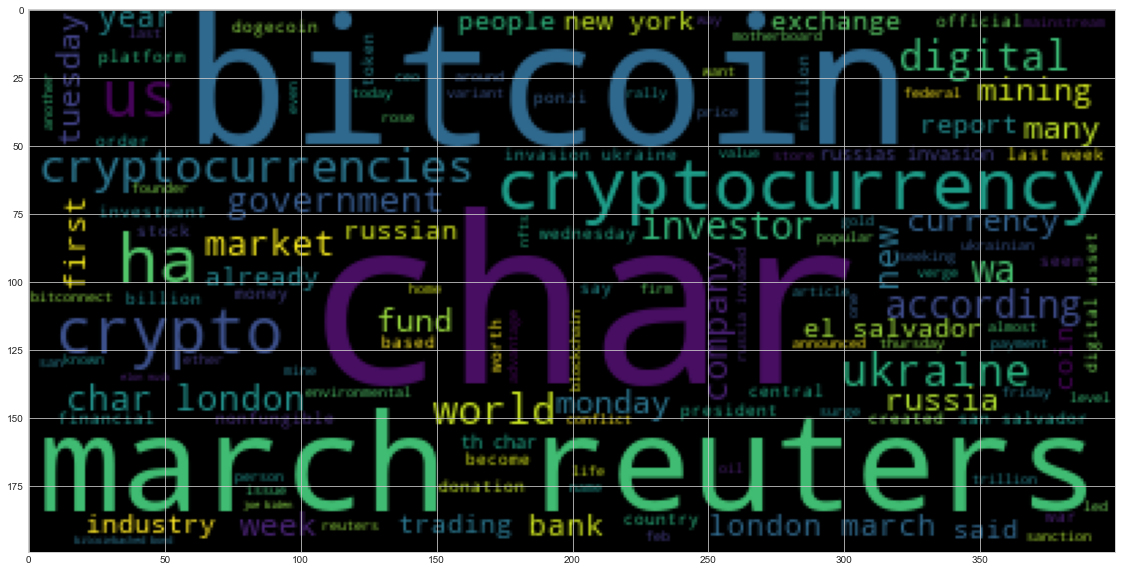

In [29]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!
btc_wc = WordCloud().generate(input_text)
plt.imshow(btc_wc)

In [30]:
# Process text for wordcloud creation
big_string_eth = ' '.join(ethereum_news)
eth_input_text = process_text(eth_big_string)

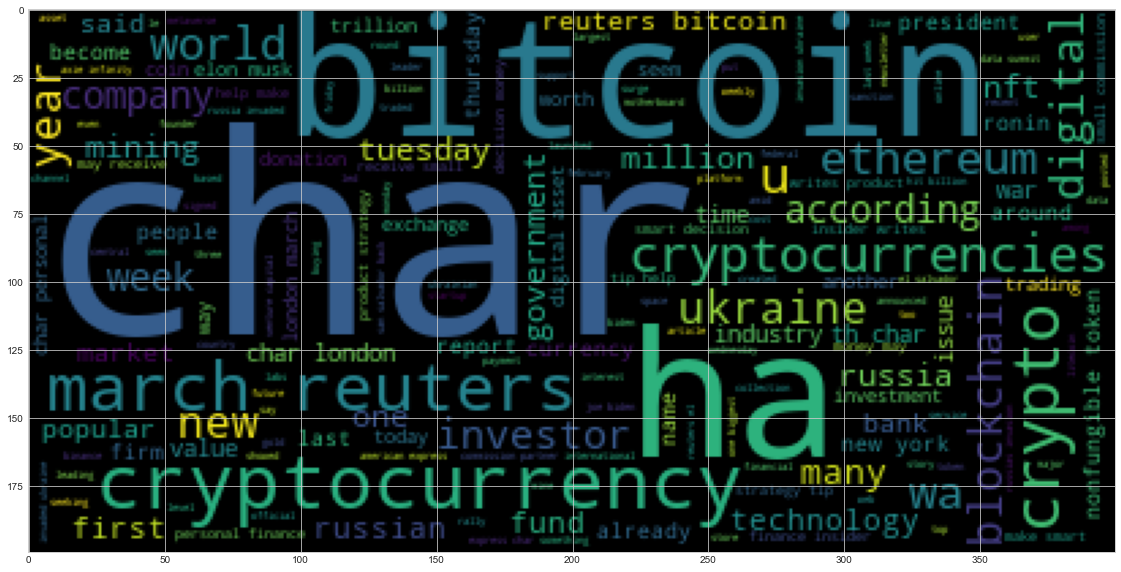

In [31]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!
eth_wc = WordCloud().generate(eth_input_text)
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [34]:
import spacy
from spacy import displacy
nlp = spacy.load("en_core_web_sm")

---
### Bitcoin NER

In [35]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!
all_btc_text = btc_big_string

In [36]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
btc_doc = nlp(all_btc_text)

# Add a title to the document
# YOUR CODE HERE!
btc_doc.user_data['title'] = 'Bitcoin NER'


In [37]:
# Render the NER visualization
# YOUR CODE HERE!
displacy.render(btc_doc, style='ent')

In [43]:
# List all Entities
# YOUR CODE HERE!
for ent in btc_doc.ents:
            print(ent.text, ent.label_)

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
SAN SALVADOR GPE
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
March 27 DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
March 1 DATE
Reuters ORG
Russia GPE
Ukraine GPE
March 22 DATE
Reuters ORG
Satoshi Nakamoto PERSON
2008 DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
Nurphoto/Getty ORG
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
LONDON GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
SAN SALVADOR GPE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
March 29 DATE
Reuters 

---

### Ethereum NER

In [44]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!
all_eth_text = eth_big_string

In [46]:
# Run the NER processor on all of the text
# YOUR CODE HERE!
eth_doc = nlp(all_eth_text)

# Add a title to the document
# YOUR CODE HERE!
eth_doc.user_data['title'] = 'Ethereum NER'

In [47]:
# Render the visualization
# YOUR CODE HERE!
displacy.render(eth_doc, style='ent')

In [48]:
# List all Entities
# YOUR CODE HERE!
for ent in eth_doc.ents:
            print(ent.text, ent.label_)
       

Spiekers PERSON
Eastern European NORP
Spieker PERSON
620,000 MONEY
Grayscale Bitcoin Trust ORG
Russia GPE
Ukraine GPE
Niki Proshin PERSON
a year DATE
YouTube ORG
TikTok ORG
Instagram ORG
Russian NORP
SAN SALVADOR GPE
March 23 DATE
Reuters ORG
El Salvador GPE
Binance PERSON
Central ORG
the New York Times ORG
March 27 DATE
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
March 1 DATE
Reuters ORG
Russia GPE
Ukraine GPE
March 22 DATE
Reuters ORG
Satoshi Nakamoto PERSON
2008 DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
this week DATE
Russia GPE
Ukraine GPE
Ukrainians NORP
Russian NORP
this week DATE
Getty
Welcome to ORG
Nonfungible Tidbits PERSON
weekly DATE
this week DATE
Nurphoto/Getty ORG
Russia GPE
last Thursday DATE
Ukranian NORP
Mexico City GPE
Telegr ORG
LONDON GPE
March 4 DATE
Reuters ORG
Russia GPE
Ukraine GPE
Russia GPE
SAN SALVADOR GPE
March 22 DATE
Reuters ORG
El Salvador GPE
last week DATE
finan GPE
March 29 DATE
Reuters 

---